In [24]:
import os
import pandas as pd
import plotnine as p9

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
def load_tennis_data(partition='train', data_dir='data/'):
    df_mens = pd.read_csv(os.path.join(data_dir, 'mens_%s_file.csv' % partition))
    df_womens = pd.read_csv(os.path.join(data_dir, 'womens_%s_file.csv' % partition))
    
    return df_mens.append(df_womens)

## Load training data

In [23]:
df_train = load_tennis_data('train')
df_train.describe()

,rally,serve,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net,id,train
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,5.961000,1.397100,30.837528,0.628731,1.470490,4.425296,2.711269,11.896579,1.927651,12.267400,1.215074e+00,28.768706,0.824491,2.189598,4.227238,12.623845,2.363476,0.551299,3922.820100,1.0
std,3.519789,0.489322,7.281336,0.976661,1.121512,3.127562,1.723021,2.800985,1.206538,2.039185,9.638810e-01,6.502463,0.681007,1.038526,2.064763,2.070811,1.312900,0.189259,2464.910637,0.0
min,3.000000,1.000000,5.176078,-0.998184,0.000378,0.000282,0.000000,2.156000,0.000200,1.389800,3.330000e-17,7.192505,0.016645,0.000164,0.000077,1.775600,0.000200,0.003201,1.000000,1.0
25%,3.000000,1.000000,26.826621,-0.027549,0.534429,1.656457,1.460489,11.216700,0.947400,11.389700,5.502500e-01,24.020881,0.404002,1.353001,2.734952,12.079200,1.351900,0.431998,1878.750000,1.0
50%,5.000000,1.000000,32.408064,0.442444,1.215461,3.908167,2.378547,12.687900,1.837000,12.566600,9.854000e-01,29.840552,0.657822,2.162321,4.121040,12.907600,2.324700,0.507933,3737.500000,1.0
75%,7.000000,2.000000,35.721018,0.969271,2.219630,7.016831,3.591717,13.557500,2.757250,13.505450,1.602700e+00,33.572370,1.022649,3.016118,5.605162,13.717450,3.243800,0.625026,5594.000000,1.0
max,38.000000,2.000000,60.414369,12.815893,16.343755,11.886069,14.480546,18.700600,7.746200,18.745800,9.352600e+00,55.282098,6.730275,4.114361,9.997963,20.211000,12.995000,1.651724,9531.000000,1.0


## Rally length

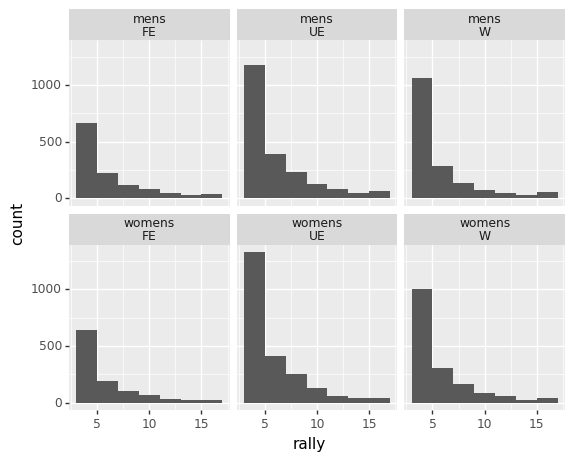

<ggplot: (-9223363308137849947)>

In [38]:
df_train_rally = df_train.copy()
df_train_rally.loc[df_train_rally['rally'] > 16, 'rally'] = 16

(p9.ggplot(df_train_rally, p9.aes(x='rally')) + 
    p9.geom_histogram(binwidth=2) + 
    p9.facet_wrap('~ gender + outcome'))

In [47]:
df_train_rally.groupby(['gender', 'outcome'])['rally'].describe()

count      mean       std  min  25%  50%  75%   max
gender outcome                                                      
mens   FE       1198.0  6.189482  3.312464  3.0  4.0  5.0  8.0  16.0
       UE       2118.0  6.083569  3.383545  3.0  3.0  5.0  8.0  16.0
       W        1684.0  5.662708  3.222804  3.0  3.0  5.0  7.0  16.0
womens FE       1074.0  5.860335  3.115821  3.0  4.0  5.0  7.0  16.0
       UE       2258.0  5.788751  3.049890  3.0  3.0  5.0  7.0  16.0
       W        1668.0  5.765588  3.113466  3.0  3.0  5.0  7.0  16.0

## Final and penultimate shot speed

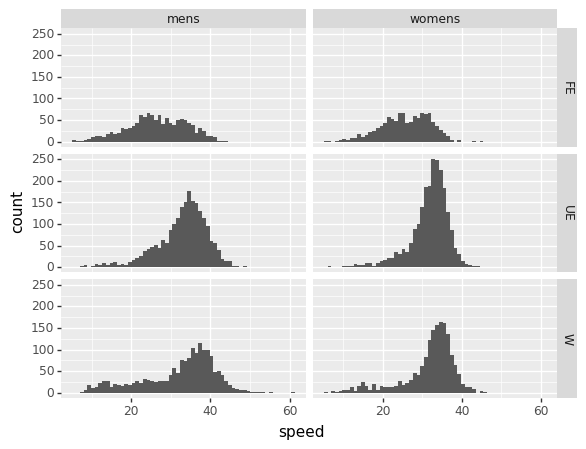

<ggplot: (8728716246357)>

In [95]:
(p9.ggplot(df_train, p9.aes(x='speed')) +
    p9.geom_histogram(bins = 60) +
    p9.facet_grid('outcome ~ gender'))

Forced errors come off your racket way slower than other shots. Winners come at the top pace although there may be some lob and drop shots. Unforced errors can be hit just as hard (but they probably go into the net or wide or deep).

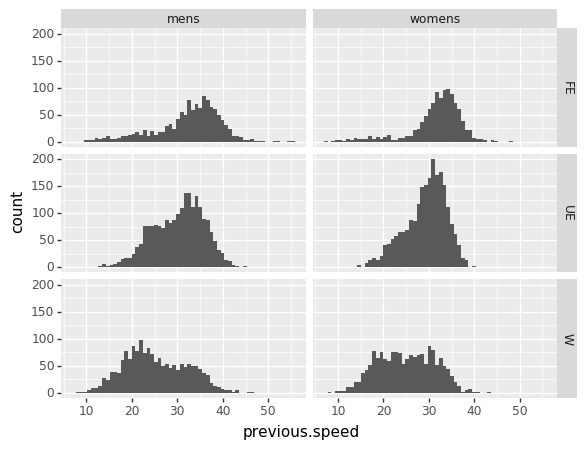

<ggplot: (8728716723425)>

In [96]:
(p9.ggplot(df_train, p9.aes(x='previous.speed')) +
    p9.geom_histogram(bins = 60) +
    p9.facet_grid('outcome ~ gender'))

Sometimes in a rally, you just mess up. On average, forced errors are caused by a little more pace on your opponent's shot. Winners come after significantly slower shots.

## Shot type

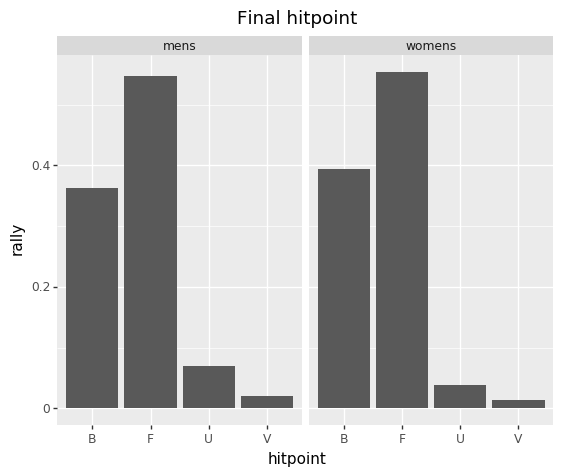

<ggplot: (8728716657398)>

In [88]:
df_train_hitpoint_counts = df_train.groupby(['gender', 'hitpoint'])['rally'].count()
df_train_hitpoint = (df_train_hitpoint_counts / df_train_hitpoint_counts.groupby(['gender']) \
                     .transform(sum)).reset_index()


(p9.ggplot(df_train_hitpoint, p9.aes(x = 'hitpoint', y = 'rally')) +
    p9.geom_bar(stat = 'identity')  +
    p9.facet_wrap('~ gender') +
    p9.labs(title = 'Final hitpoint'))

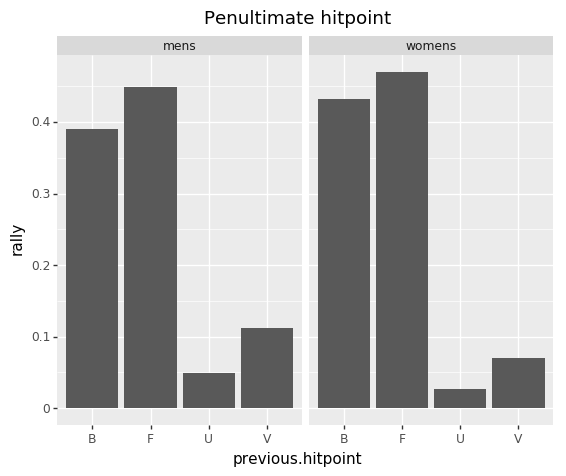

<ggplot: (-9223363308138061403)>

In [89]:
df_train_hitpoint_counts = df_train.groupby(['gender', 'previous.hitpoint'])['rally'].count()
df_train_hitpoint = (df_train_hitpoint_counts / df_train_hitpoint_counts.groupby(['gender']) \
                     .transform(sum)).reset_index()


(p9.ggplot(df_train_hitpoint, p9.aes(x = 'previous.hitpoint', y = 'rally')) +
    p9.geom_bar(stat = 'identity')  +
    p9.facet_wrap('~ gender') +
    p9.labs(title = 'Penultimate hitpoint'))

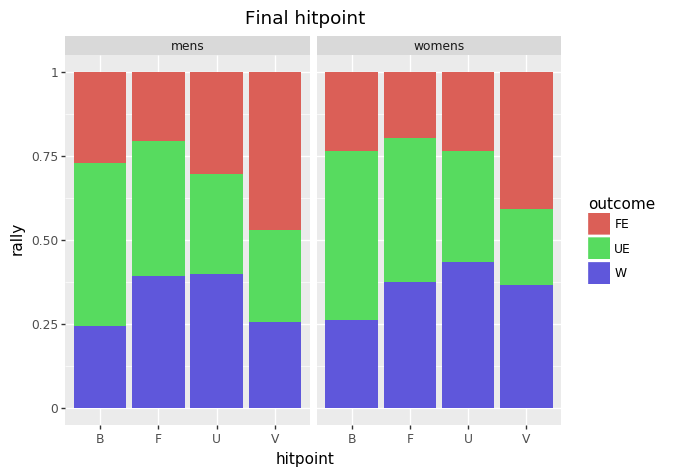

<ggplot: (8728716648989)>

In [83]:
df_train_hitpoint_counts = df_train.groupby(['gender', 'hitpoint', 'outcome'])['rally'].count()
df_train_hitpoint = (df_train_hitpoint_counts / df_train_hitpoint_counts.groupby(['gender', 'hitpoint']) \
                     .transform(sum)).reset_index()


(p9.ggplot(df_train_hitpoint, p9.aes(x = 'hitpoint', y = 'rally', fill = 'outcome')) +
    p9.geom_bar(stat = 'identity')  +
    p9.facet_wrap('~ gender') +
    p9.labs(title = 'Final hitpoint by outcome'))

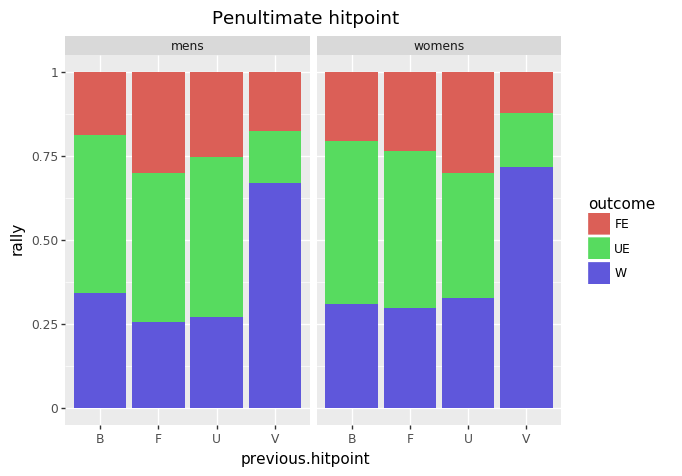

<ggplot: (8728720998955)>

In [87]:
df_train_penult_hitpoint_counts = df_train.groupby(['gender', 'previous.hitpoint', 'outcome'])['rally'].count()
df_train_penult_hitpoint = (df_train_penult_hitpoint_counts / df_train_penult_hitpoint_counts.groupby(['gender', 'previous.hitpoint']) \
                            .transform(sum)).reset_index()


(p9.ggplot(df_train_penult_hitpoint, p9.aes(x = 'previous.hitpoint', y = 'rally', fill = 'outcome')) +
    p9.geom_bar(stat = 'identity')  +
    p9.facet_wrap('~ gender') +
    p9.labs(title = 'Penultimate hitpoint'))

## Defining what a winner is

A winner _should_ be defined as a shot that is untouched by your opponent that goes over the net and lands inside the baseline and sidelines. Let's see if there is any variance in the HawkEye sensor data...

Maybe we should consider cases where the ball clips the net and drops in for a winner.

In [114]:
# net.clearance (> 0)
# outside.sideline (False)
# outside.baseline (False)

df_train['clears_net'] = df_train['net.clearance'] > 0
df_train['expected_winner'] = df_train['clears_net'] & -df_train['outside.sideline'] & -df_train['outside.baseline']

In [115]:
df_train.groupby('outcome')['clears_net'].mean()

outcome
FE    0.562940
UE    0.609004
W     0.981802
Name: clears_net, dtype: float64

In [125]:
df_train_counts = df_train.groupby(['outcome', 'expected_winner'])['rally'].count()
(df_train_counts / df_train_counts.groupby(['outcome']) \
                     .transform(sum))

outcome  expected_winner
FE       False              0.900968
         True               0.099032
UE       False              0.934644
         True               0.065356
W        False              0.026551
         True               0.973449
Name: rally, dtype: float64

In [130]:
df_train_counts = df_train.groupby(['expected_winner', 'outcome'])['rally'].count()
(df_train_counts / df_train_counts.groupby(['expected_winner']) \
                     .transform(sum))

expected_winner  outcome
False            FE         0.328783
                 UE         0.656923
                 W          0.014295
True             FE         0.059618
                 UE         0.075782
                 W          0.864600
Name: rally, dtype: float64

13.5% of "expected winners" are not actually winners. This could be a result of faulty sensor data and bad, unchallenged line calls.

In [128]:
df_train_counts = df_train.groupby(['outcome', 'expected_winner', 'clears_net'])['rally'].count()
(df_train_counts / df_train_counts.groupby(['outcome', 'expected_winner']) \
                     .transform(sum))

outcome  expected_winner  clears_net
FE       False            False         0.485100
                          True          0.514900
         True             True          1.000000
UE       False            False         0.418337
                          True          0.581663
         True             True          1.000000
W        False            False         0.685393
                          True          0.314607
         True             True          1.000000
Name: rally, dtype: float64